<a href="https://colab.research.google.com/github/adityamishra5050/Sentiment-Analysis-of-Company-Reviews-/blob/main/DL_Project_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries

import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline


In [ ]:
# Connecting google drive to colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

d1 = os.chdir('/content/drive/MyDrive/DLP')
!ls

test.csv  test.csv.zip	train.csv  train.csv.zip  wordcloud11.png


In [ ]:
traindf = pd.read_csv('/content/drive/MyDrive/DLP/train.csv')
traindf.head()

,Id,Review,Rating
0,0,Very good value and a great tv very happy and ...,5
1,1,After 6 month still can't access my account,3
2,2,I couldn't make an official review on a produc...,1
3,3,"Fantastic! Extremely easy to use website, fant...",5
4,4,So far annoyed as hell with this bt monthly pa...,1


In [ ]:
testdf = pd.read_csv('/content/drive/MyDrive/DLP/test.csv')
testdf.head()

,Id,Review
0,60000,"Absolutely abysmal. Offered fibre broadband, a..."
1,60001,"Order delivered when promised, effective commu..."
2,60002,I originally contacted your help desk as I tho...
3,60003,To be honest I was a bit worried as these guys...
4,60004,Took out a Vodafone upgrade after receiving a ...


In [ ]:
traindf.describe()

,Id,Rating
count,60000.000000,60000.00000
mean,29999.500000,3.56255
std,17320.652413,1.82283
min,0.000000,1.00000
25%,14999.750000,1.00000
50%,29999.500000,5.00000
75%,44999.250000,5.00000
max,59999.000000,5.00000


In [ ]:
traindf.Rating.unique()

array([5, 3, 1, 4, 2])

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = px.pie(data_frame= traindf, names= traindf.Rating.value_counts().index, values= traindf.Rating.value_counts(), title= 'Ratings distribution diagram')
fig.show()

In [ ]:
# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=traindf.Rating.value_counts().index, values=traindf.Rating.value_counts(), pull=[0.2, 0.2, 0.2, 0.2, 0.2])])
fig.show()

In [ ]:
# nltk
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

************  Stop Words Preview through Word Cloud  ****************


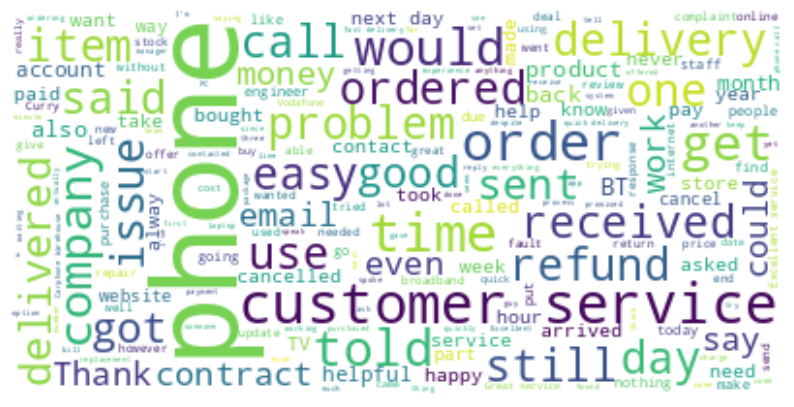

In [ ]:
# Create stopword list:
stopwords = stopwords.words("english")
textt = " ".join(review for review in traindf.Review)
wordcloud = WordCloud(background_color='white', stopwords=stopwords).generate(textt)
print('************  Stop Words Preview through Word Cloud  ****************')
plt.rcParams['figure.figsize'] = (10,10)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [ ]:
traindf1=traindf.copy()

In [ ]:
conditions = [
    (traindf['Rating'] < 3),
    (traindf['Rating'] >= 3 ) & (traindf['Rating'] <= 4),
    (traindf['Rating'] == 5)]
choices = ['Negative', 'Neutral', 'Postivie']
traindf1['CharRating'] = np.select(conditions, choices, default= 'Unrated')

In [ ]:
traindf1

,Id,Review,Rating,CharRating
0,0,Very good value and a great tv very happy and ...,5,Postivie
1,1,After 6 month still can't access my account,3,Neutral
2,2,I couldn't make an official review on a produc...,1,Negative
3,3,"Fantastic! Extremely easy to use website, fant...",5,Postivie
4,4,So far annoyed as hell with this bt monthly pa...,1,Negative
...,...,...,...,...
59995,59995,"Response was very quick, engineer arrived when...",5,Postivie
59996,59996,"I'm trying my best to leave TalkTalk, unfortun...",1,Negative
59997,59997,Just what do we get for paying this money for ...,1,Negative
59998,59998,Could not make our mind on which TV to purchas...,5,Postivie


In [ ]:
traindf1.Review[0]

'Very good value and a great tv very happy and delivery next day and free well done Hughes'

In [ ]:
traindf1['review_length']=[len(_) for _ in traindf.Review]
traindf1['token_count'] = [len(_.split()) for _ in traindf1.Review]
traindf1.head()

,Id,Review,Rating,CharRating,review_length,token_count
0,0,Very good value and a great tv very happy and ...,5,Postivie,89,18
1,1,After 6 month still can't access my account,3,Neutral,43,8
2,2,I couldn't make an official review on a produc...,1,Negative,496,92
3,3,"Fantastic! Extremely easy to use website, fant...",5,Postivie,197,32
4,4,So far annoyed as hell with this bt monthly pa...,1,Negative,222,49


In [ ]:
traindf1['review_length'].describe()

count    60000.000000
mean       309.070083
std        423.772492
min         31.000000
25%         82.000000
50%        164.000000
75%        358.000000
max       7794.000000
Name: review_length, dtype: float64

In [ ]:
traindf1['token_count'].describe()

count    60000.00000
mean        56.56325
std         79.35289
min          1.00000
25%         14.00000
50%         29.00000
75%         66.00000
max       1439.00000
Name: token_count, dtype: float64

<Axes: title={'center': 'Train token count histogram'}, xlabel='token_count', ylabel='Count'>

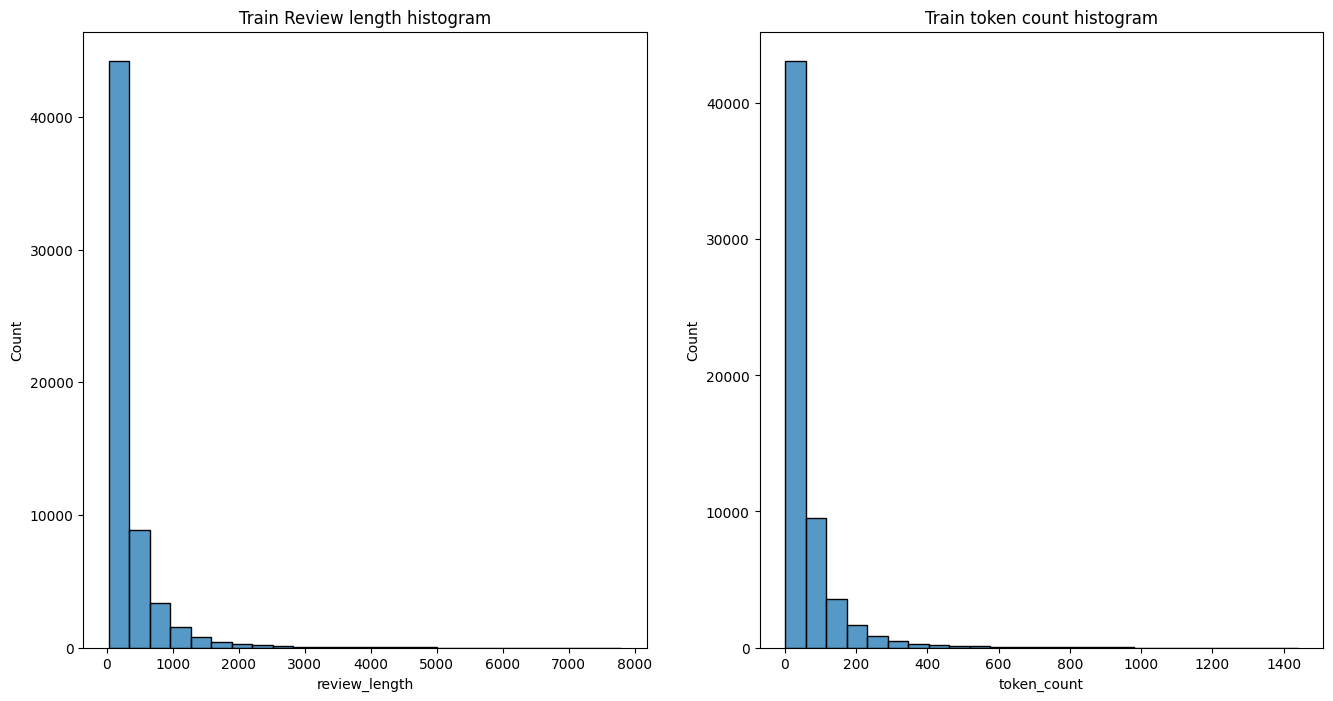

In [ ]:
import seaborn as sns
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Train Review length histogram')
sns.histplot(data=traindf1, x='review_length', bins=25, ax=ax1)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Train token count histogram')
sns.histplot(data=traindf1, x='token_count', bins=25, ax=ax2)



<Axes: title={'center': 'Train token count histogram'}, xlabel='Rating', ylabel='token_count'>

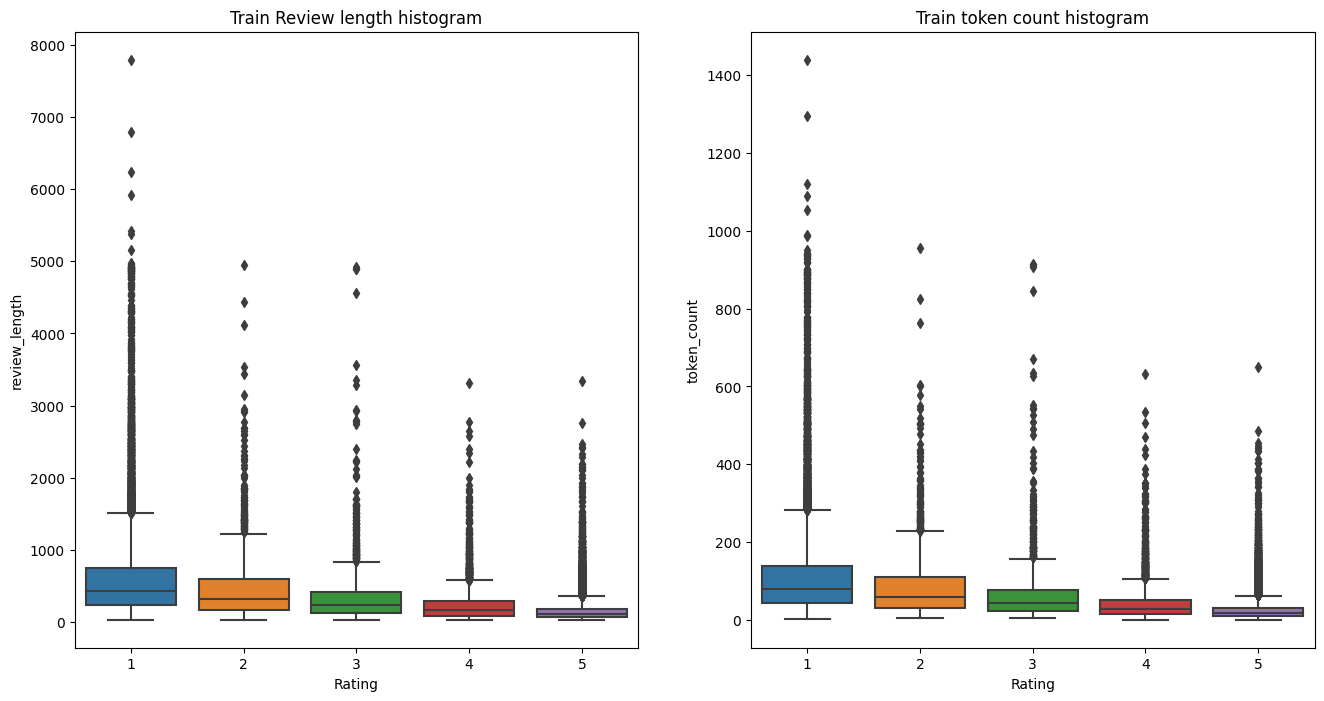

In [ ]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Train Review length histogram')
sns.boxplot(data=traindf1, y='review_length',x= 'Rating', ax=ax1)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Train token count histogram')
sns.boxplot(data=traindf1, y='token_count', x= 'Rating', ax=ax2)